<a href="https://colab.research.google.com/github/ThGreatExplorer/NOVA/blob/main/rnn_nustar_smote_V0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original class counts: {np.uint8(0): np.int64(3331), np.uint8(1): np.int64(11145)}
X shape: (14476, 1800)
y shape: (14476,)
Pulsars: 11145, Black holes: 3331


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "NuSTAR_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1800, 128)      │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1800, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 1800, 64)       │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1800, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 16)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,281 (317.50 KB)

 Trainable params: 81,281 (317.50 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1446s 6s/step - accuracy: 0.5446 - auc: 0.5783 - loss: 0.6846 - val_accuracy: 0.6164 - val_auc: 0.6883 - val_loss: 0.6554 - learning_rate: 0.0010
Epoch 2/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1372s 6s/step - accuracy: 0.5629 - auc: 0.5847 - loss: 0.6736 - val_accuracy: 0.5492 - val_auc: 0.5647 - val_loss: 0.6703 - learning_rate: 0.0010
Epoch 3/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1370s 6s/step - accuracy: 0.5184 - auc: 0.5370 - loss: 0.6806 - val_accuracy: 0.5844 - val_auc: 0.5658 - val_loss: 0.6719 - learning_rate: 0.0010
Epoch 4/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1387s 6s/step - accuracy: 0.5514 - auc: 0.5583 - loss: 0.6819 - val_accuracy: 0.5782 - val_auc: 0.5736 - val_loss: 0.6805 - learning_rate: 0.0010
Epoch 5/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1406s 6s/step - accuracy: 0.5780 - auc: 0.5864 - loss: 0.6795 - val_accuracy: 0.5787 - val_auc: 0.5674 - val_loss: 0.6798 - learning_rate: 0.0010
Epoch 6/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1396s 6s/step - accuracy:

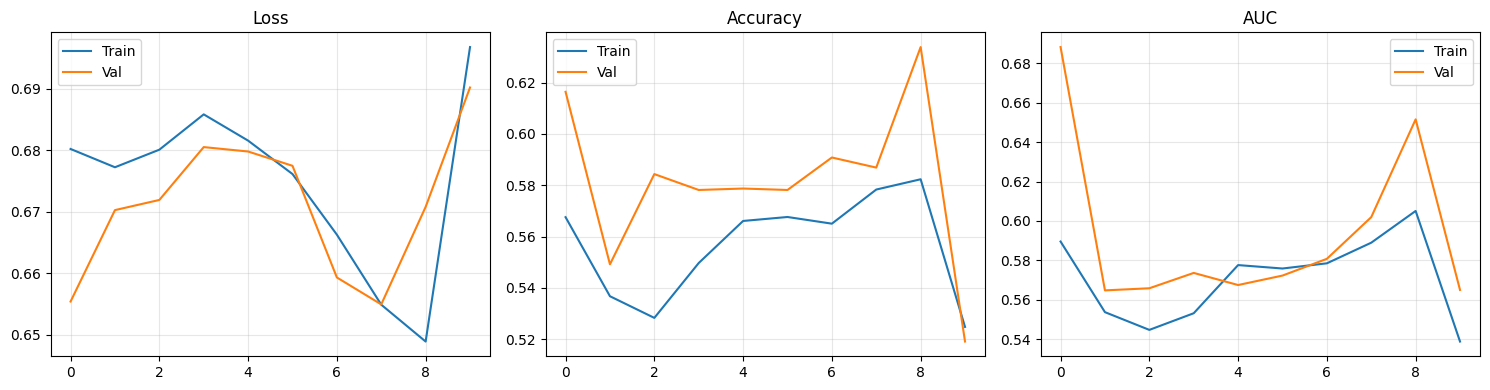

139/139 ━━━━━━━━━━━━━━━━━━━━ 110s 784ms/step

Classification Report:
              precision    recall  f1-score   support

  Black Hole       0.90      0.16      0.27      2215
      Pulsar       0.54      0.98      0.70      2229

    accuracy                           0.57      4444
   macro avg       0.72      0.57      0.49      4444
weighted avg       0.72      0.57      0.49      4444



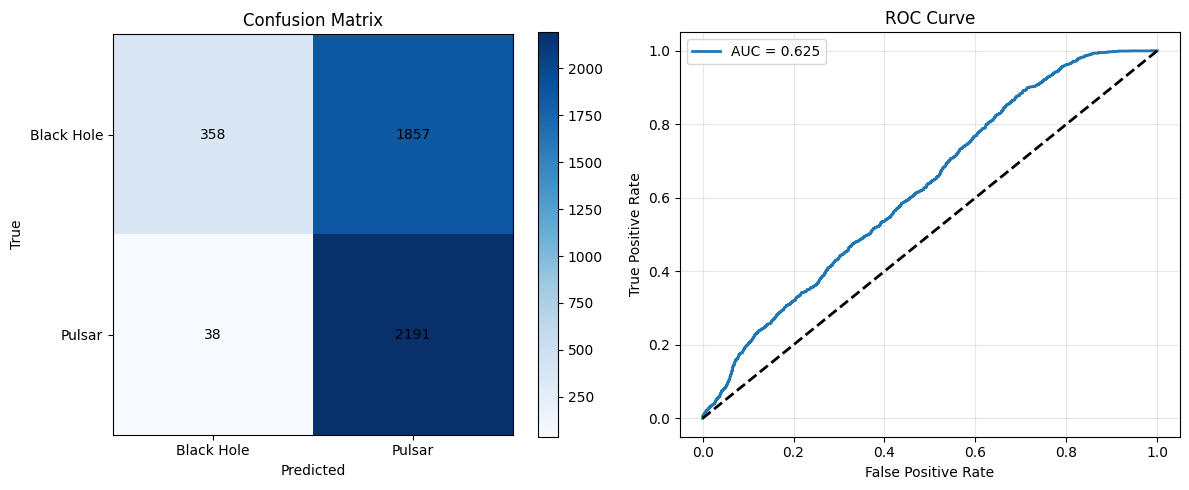

Resampled class counts: {np.uint8(0): np.int64(11075), np.uint8(1): np.int64(11145)}


In [ ]:
#google colab pro **
#RNN - this time with smote (adasyn)
#packages
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from imblearn.over_sampling import ADASYN

#Data
with h5py.File('/content/small_1800.h5', 'r') as f:  #nolan's smaller databite
    phi = f['phi'][:]   #light curves
    y = f['is_pulsar'][:]

#count_class = y.value_counts() #to compare and check smote - ORIGINAL LINE
unique_elements, counts_elements = np.unique(y, return_counts=True)
print(f"Original class counts: {dict(zip(unique_elements, counts_elements))}")

#X = phi.reshape(phi.shape[0], phi.shape[1], 1)  #need 3d input for rnn
#crap. only 2d allowed for adasyn.
X = phi.reshape(phi.shape[0], phi.shape[1])

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Pulsars: {np.sum(y)}, Black holes: {np.sum(1-y)}")

adasyn = ADASYN(sampling_strategy='minority') #adaptive synthetic sampeling to help with more pulsar in small1800
X_res, y_res = adasyn.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res #stratify by y_res after resampling
)
#80 % train, 20 % test splits
#stratify to not lose pulsar vs bh
# Normalize
n_samples, seq_len = X_train.shape # X_train is now 2D
X_train_reshaped = X_train.reshape(n_samples, seq_len, 1) # Reshape for RNN input
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) # Reshape for RNN input

n_features = 1 # Since we reshaped to (samples, timesteps, 1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped.reshape(-1, n_features)).reshape(n_samples, seq_len, n_features)
X_test_scaled = scaler.transform(X_test_reshaped.reshape(-1, n_features)).reshape(X_test.shape[0], X_test.shape[1], n_features)

# Build model
model = models.Sequential(name='NuSTAR_Classifier')
#64 units
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True),   #going back and forward - want this bc of pulsar periodicy
                               input_shape=(seq_len, n_features)))
model.add(layers.Dropout(0.3)) #turning off 30% neurons during training
#32 units
model.add(layers.Bidirectional(layers.LSTM(32, return_sequences=True)))  #passing full sequence with return_sequence
model.add(layers.Dropout(0.3))
#16 units
model.add(layers.LSTM(16))
model.add(layers.Dropout(0.4))
#32 units
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.3))
#16 units
model.add(layers.Dense(16, activation='relu'))
#single vector for output
model.add(layers.Dense(1, activation='sigmoid')) #0 = black hole, 1 = pulsar

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc')]
)

print(model.summary())

# Train
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),  #patience for 50, rn doing 10 so doesnt really matter lol
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6) #if loss plateaus at 5 epochs cutting learning rate in half
]

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

# Evaluate
test_loss, test_acc, test_auc = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Plot training history
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].plot(history.history['loss'], label='Train')
axes[0].plot(history.history['val_loss'], label='Val')
axes[0].set_title('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history['accuracy'], label='Train')
axes[1].plot(history.history['val_accuracy'], label='Val')
axes[1].set_title('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].plot(history.history['auc'], label='Train')
axes[2].plot(history.history['val_auc'], label='Val')
axes[2].set_title('AUC')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion matrix and ROC
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()   #greater than 0.5 = pulsar :)

cm = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Black Hole', 'Pulsar']))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix
im = axes[0].imshow(cm, cmap='Blues')
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Black Hole', 'Pulsar'])
axes[0].set_yticklabels(['Black Hole', 'Pulsar'])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix')
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, cm[i, j], ha="center", va="center")
plt.colorbar(im, ax=axes[0])             #want result of >0.9

# ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.3f}')
axes[1].plot([0, 1], [0, 1], 'k--', lw=2)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#print(y_res.value_counts()) #check dif in y - ORIGINAL LINE
unique_res, counts_res = np.unique(y_res, return_counts=True)
print(f"Resampled class counts: {dict(zip(unique_res, counts_res))}")

# Save model
model.save('/content/nustar_rnn_classifier_smallV2.keras')

In [ ]:
#google colab pro **
#adjusted to properly apply the smote
#RNN - this time with smote (for real this time)
#packages
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from imblearn.over_sampling import SMOTE

#Data
with h5py.File('/content/small_1800.h5', 'r') as f:  #nolan's smaller databite
    phi = f['phi'][:]   #light curves
    y = f['is_pulsar'][:]

unique, counts = np.unique(y, return_counts=True)
print("Before SMOTE:")
print(f"Black holes: {counts[0]}, Pulsars: {counts[1]}")

#X = phi.reshape(phi.shape[0], phi.shape[1], 1)  #need 3d input for rnn
# Only 2d allowed for smote.
X = phi.reshape(phi.shape[0], phi.shape[1])

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Pulsars: {np.sum(y)}, Black holes: {np.sum(1-y)}")

smote = SMOTE(sampling_strategy='minority') #synthetic sampeling to help with more pulsar in small1800
X_res, y_res = smote.fit_resample(X, y)

#Reshaping back to 3D for RNN
X_res = X_res.reshape(X_res.shape[0], X_res.shape[1], 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)
#80 % train, 20 % test splits
#stratify to not lose pulsar vs bh

# Normalize
#n_samples, seq_len, n_features = X_train.shape
#X_train_reshaped = X_train.reshape(-1, n_features)
#X_test_reshaped = X_test.reshape(-1, n_features)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train_reshaped).reshape(n_samples, seq_len, n_features)
#X_test_scaled = scaler.transform(X_test_reshaped).reshape(X_test.shape)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)

# Build model
model = models.Sequential(name='NuSTAR_Classifier')
#64 units
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True),   #going back and forward - want this bc of pulsar periodicy
                               input_shape=(seq_len, n_features)))
model.add(layers.Dropout(0.3)) #turning off 30% neurons during training
#32 units
model.add(layers.Bidirectional(layers.LSTM(32, return_sequences=True)))  #passing full sequence with return_sequence
model.add(layers.Dropout(0.3))
#16 units
model.add(layers.LSTM(16))
model.add(layers.Dropout(0.4))
#32 units
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.3))
#16 units
model.add(layers.Dense(16, activation='relu'))
#single vector for output
model.add(layers.Dense(1, activation='sigmoid')) #0 = black hole, 1 = pulsar

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc')]
)

print(model.summary())

# Train
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),  #patience for 50, rn doing 10 so doesnt really matter lol
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6) #if loss plateaus at 5 epochs cutting learning rate in half
]

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

# Evaluate
test_loss, test_acc, test_auc = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Plot training history
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].plot(history.history['loss'], label='Train')
axes[0].plot(history.history['val_loss'], label='Val')
axes[0].set_title('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history['accuracy'], label='Train')
axes[1].plot(history.history['val_accuracy'], label='Val')
axes[1].set_title('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].plot(history.history['auc'], label='Train')
axes[2].plot(history.history['val_auc'], label='Val')
axes[2].set_title('AUC')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion matrix and ROC
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()   #greater than 0.5 = pulsar :)

cm = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Black Hole', 'Pulsar']))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix
im = axes[0].imshow(cm, cmap='Blues')
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Black Hole', 'Pulsar'])
axes[0].set_yticklabels(['Black Hole', 'Pulsar'])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix')
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, cm[i, j], ha="center", va="center")
plt.colorbar(im, ax=axes[0])             #want result of >0.9

# ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.3f}')
axes[1].plot([0, 1], [0, 1], 'k--', lw=2)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check difference in y
print("\nAfter SMOTE:")
unique_res, counts_res = np.unique(y_res, return_counts=True)
print(f"Black holes: {counts_res[0]}, Pulsars: {counts_res[1]}")

# Save model
model.save('/content/nustar_rnn_classifier_smallV3.keras')

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'